In [2]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# sample example -- Principal Component Analysis
# Generally this is called a data reduction technique.

In [3]:
# we will use make_blobs to generate 100 x 10 matrix data, such that there are 100 samples with 
# 10 observations. These 100 samples were generated from four different clusters. 
# Since it is simulated, we know which cluster each sample belong to.

In [3]:
X1, Y1 = make_blobs(n_features=10, 
                    n_samples=100,
                    centers=4, 
                    random_state=45,
                    cluster_std=2)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [4]:
Y1[:20]

array([0, 1, 0, 2, 2, 0, 2, 0, 2, 3, 0, 1, 3, 1, 1, 0, 2, 3, 3, 2])

In [ ]:
# Here, X1 is the 100 x 10 data and Y1 is cluster assignment for the 100 samples. 
# Let us create a PCA model with 4 components from sklearn.decomposition.

In [5]:
pca = PCA(n_components=4)

In [6]:
# The simulated data is already centered and scales, so we can go ahead and fit PCA model. 
# We will fit PCA model using fit_transform function to our data X1 and the result pc contains 
# the principal components.

pc = pca.fit_transform(X1)

In [7]:
# make a pandas data frame with the principal components (PCs) and the known cluster assignments.

pc_df = pd.DataFrame(data = pc , 
                     columns = ['PC1', 'PC2','PC3','PC4'])

pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,20.049362,-4.950132,-5.024890,-1.689256,0
1,-11.533169,-10.106487,-6.745059,-1.681968,1
2,17.744190,-1.259561,-3.940464,-0.246363,0
3,-4.721609,16.961616,-1.691466,-1.379305,2
4,-6.283565,13.032826,-5.202125,4.218606,2


In [8]:
# Let us examine the variance explained by each principal component. 
# We can clearly see that the first two principal components explains over 70% of the variation 
# in the data.

In [10]:
print("Explained Variance: ", pca.explained_variance_ratio_)

Explained Variance:  [0.41073719 0.34891107 0.14140917 0.02053805]


In [11]:
# Let us plot the variance explained by each principal component. 
df_var = pd.DataFrame({'variance': pca.explained_variance_ratio_,
                      'PC':['PC1','PC2','PC3','PC4']})
df_var

,PC,variance
0,PC1,0.410737
1,PC2,0.348911
2,PC3,0.141409
3,PC4,0.020538


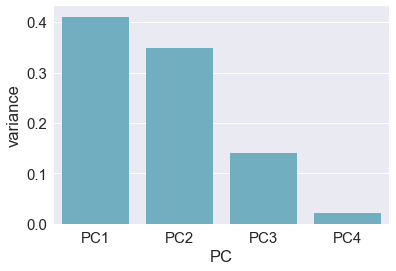

In [12]:
sns.barplot(x='PC',
            y="variance", 
            data=df_var, 
            color="c");

In [13]:
# Now we can use the top two principal components and make scatter plot. 
# We will use Seaborn’s lmplot to make the PCA plot using the fit_reg=False option and 
# color clusters with ‘hue’.

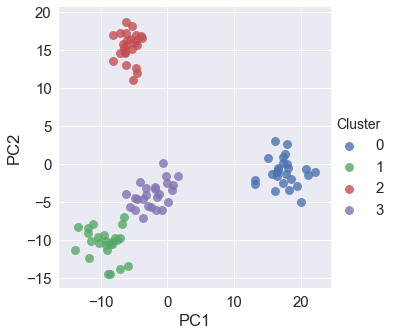

In [15]:
sns.lmplot(x="PC1", 
           y="PC2",
           data=pc_df, 
           fit_reg=False, 
           hue='Cluster', # color by cluster
           legend=True,
           scatter_kws={"s": 80}) # specify the point size

In [ ]:
# We can clearly see the four clusters in our data. The two principal components are able 
# to completely separate the clusters.